# FORESEE Tutorial - Heavy Neutral Leptons (HNLs)

### Load Libraries 

In [1]:
import sys
src_path = "/Users/alechewitt/Desktop/Jonathan_research/Git/FORESEE_HNL"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model

from matplotlib import pyplot as plt

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [2]:
foresee = Foresee()

HNL's are produced mainly via $\text{D}^+_s$ meson decay. To start, let us have a look at the $\text{D}^+_s$ spectrum in terms of the angle with respect to the beam axis $\theta$ and the momentum $p$. This can be done using the function `get_spectrumplot` which requires the MC particle ID (or simply pid), the MC generator and the energy. The units on the coloraxis are pb/bin. 

FORESEE provides the 2D spectrum as tables for a variety of particles ($\text{D}^+_s$, $\eta$, ...), generators (SIBYLL, EPOSLHC, QGSJET, PYTHIA) and collision energies (14, 27 and 100 TeV). The datafiles are stored in the directory `files/hadrons`. Let us show the $\text{D}^+_s$ spectrum here. 

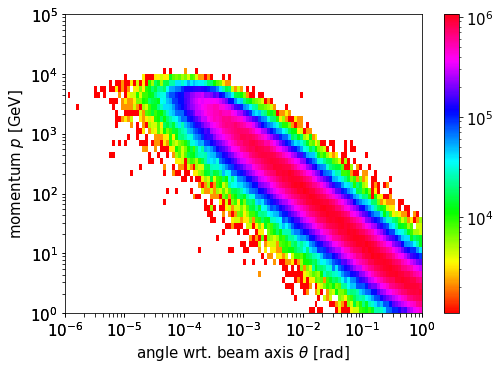

In [29]:
plot=foresee.get_spectrumplot(pid="431", generator="pythia8", energy="27")
plot.show()

## 2. Specifying the Model: Heavy Neutral Leptons

The phenomenology of a right handed Heavy Neutral Lepton $\tilde{N}$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L}_{HNL}=i \bar{\tilde{N}} \gamma^{\mu} \partial_{\mu} \tilde{N} - F_{\alpha } \bar{L}_{\alpha} \tilde{N} \tilde{\Phi}- \frac{1}{2} \bar{\tilde{N}}^c M_N \tilde{N} + \rm{h.c.}
\end{equation}

with the HNL masses $M_N$ and the Yukawa couplings to SM leptons $F_{\alpha}$ as free parameters with $\alpha=e,\mu, \tau$. For the search for HNL's at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of HNL's as function of the two sets parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. Optionally, we can also add the `path` to the directory where the model is stored. 

In [40]:
'''#for D+ 411 (c \bar{d})
energy = "14"
modelname="HNL"
#model = Model(modelname, path="./")
masse=0.000511 #GeV mass of electron, in this case because we consider D+ -> e + N
SecToGev=1./(6.582122*pow(10.,-25.))
tauH=1040*10**(-15)*SecToGev #GeV; lifetime of meson
VH=.221 #unitless Vcd matrix element
MH=1.8696 #mass of D+ in GeV
fH=.2226 #GeV
GF=1.166378*10**(-5) #GeV^(-2)
prefactorDp=((tauH*GF**2*fH**2*VH**2)/(8*np.pi))
print(prefactorDp)
#coupling is Ualpha'''

'#for D+ 411 ($$c \x08ar{d}$$)\nenergy = "14"\nmodelname="HNL"\n#model = Model(modelname, path="./")\nmasse=0.000511 #GeV mass of electron, in this case because we consider D+ -> e + N\nSecToGev=1./(6.582122*pow(10.,-25.))\ntauH=1040*10**(-15)*SecToGev #GeV; lifetime of meson\nVH=.221 #unitless\nMH=1.8696 #mass of D+ in GeV\nfH=.2226 #GeV\nGF=1.166378*10**(-5) #GeV^(-2)\nprefactorDp=((tauH*GF**2*fH**2*VH**2)/(8*np.pi))\nprint(prefactorDp)\n#coupling is Ualpha'

In [5]:
#for D+s 431 (c \bar{s})
energy = "14"
modelname="HNL"
model = Model(modelname, path="./")
masse=0.000511 #GeV
SecToGev=1./(6.582122*pow(10.,-25.))
tauH=500*10**(-15)*SecToGev #GeV
VH=0.987 #unitless Vcs CKM matrix element
MH=1.96847 #mass of D+ in GeV
fH=.2801 #GeV
GF=1.166378*10**(-5) #GeV^(-2)
prefactorDps=((tauH*GF**2*fH**2*VH**2)/(8*np.pi))
#prefactorDps=1
print(prefactorDps)
#coupling is Ualpha

0.3142703280466045


**Production** Most LLPs are produced in the decay of primary particles. Here we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. We additionally specify the variable `nsample` which specifies how often each parent particle is decayed. 

For the HNL, we have the branching fraction

\begin{equation}
    \text{Br} \left(H^+ \rightarrow \ell_{\alpha}^{+} N \right) = \tau_H \frac{G_F^2 f_H^2 M_H M_N^2}{8 \pi} |V_H|^2 |U_{\alpha}|^2 \cdot \left( 1- \frac{M_N^2}{M_H^2} + 2 \frac{M_{\ell}^2}{M_H^2}+ \frac{M_{\ell}^2}{M_N^2} \left( 1- \frac{M_{\ell}^2}{M_H^2} \right) \right)\times \sqrt{\left(1+ \frac{M_N^2}{M_H^2}- \frac{M_{\ell}^2}{M_H^2}\right)^2 - 4 \frac{M_N^2}{M_H^2}}
\end{equation}

There is also the option for 3-body decays $p_0 \to p_1 p_2 p_3$ with $p_3$ being the LLP. This can be added using the function `add_production_3bodydecay()`. It requires to provide `br` which is the differential branching fraction $d\text{BR}/(dq \ d\cos\vartheta)$ where $q^2=(p_2+p_3)^2$ and $\vartheta$ is the angle between $p_3$ in the restframe of $p_2+p_3$ and the direction of $p_2+p_3$ in the restframe of $p_0$. We do not have an example for this in the dark photon case. 

In [6]:
#for D+
'''model.add_production_2bodydecay(
    pid0 = "411",
    pid1 = "-11",
    br=str(prefactorDp)+"*coupling**2*mass**2*self.masses('411')*(1.-(mass/self.masses('411'))**2 + 2.* (0.000511/self.masses('411'))**2 + (0.000511/mass)**2*(1.-(0.000511/self.masses('411'))**2)) * np.sqrt((1.+(mass/self.masses('411'))**2 - (0.000511/self.masses('411'))**2)**2-4.*(mass/self.masses('411'))**2)",
    generator = "Pythia8",
    energy = energy,
    nsample = 10
)'''

'model.add_production_2bodydecay(\n    pid0 = "411",\n    pid1 = "-11",\n    br=str(prefactorDp)+"*coupling**2*mass**2*self.masses(\'411\')*(1.-(mass/self.masses(\'411\'))**2 + 2.* (0.000511/self.masses(\'411\'))**2 + (0.000511/mass)**2*(1.-(0.000511/self.masses(\'411\'))**2)) * np.sqrt((1.+(mass/self.masses(\'411\'))**2 - (0.000511/self.masses(\'411\'))**2)**2-4.*(mass/self.masses(\'411\'))**2)",\n    generator = "Pythia8",\n    energy = energy,\n    nsample = 10\n)'

In [7]:
#for D+s
model.add_production_2bodydecay(
    pid0 = "431",
    pid1 = "-11",
    br=str(prefactorDps)+"*coupling**2*mass**2*self.masses('431')*(1.-(mass/self.masses('431'))**2 + 2.* (0.000511/self.masses('431'))**2 + (0.000511/mass)**2*(1.-(0.000511/self.masses('431'))**2)) * np.sqrt((1.+(mass/self.masses('431'))**2 - (0.000511/self.masses('431'))**2)**2-4.*(mass/self.masses('431'))**2)",
    generator = "Pythia8",
    energy = energy,
    nsample = 10
)

We can also produce the dark photon via it's resonant mixing with the SM vector mesons, in particular the $\omega$, $\rho$ and $\phi$ mesons. Following [arXiv:1810.01879](https://arxiv.org/pdf/1810.01879.pdf), we can write 

\begin{equation}
    \sigma(A') = \theta_V^2 \  \sigma(V)
    \quad\quad\text{with}\quad\quad
    \theta_V = \frac{\epsilon e}{g_V}  \frac{m_V^2}{m_{A'}^2 - m_V^2 + i m_V \Gamma_V}
\end{equation}

Here $g_\omega = 17$, $g_\rho=5$ and $g_\phi=-12.88$. We can specify this production mode using `model.add_production_mixing()`. In the following, we focus on the $\rho$, which provides the leading contribution. 

In [8]:
'''model.add_production_mixing(
    pid = "113",
    mixing = "coupling * 0.3/5. * 0.77545**2/abs(mass**2-0.77545**2+0.77545*0.147*1j)",
    generator = "EPOSLHC",
    energy = energy,
)'''

'model.add_production_mixing(\n    pid = "113",\n    mixing = "coupling * 0.3/5. * 0.77545**2/abs(mass**2-0.77545**2+0.77545*0.147*1j)",\n    generator = "EPOSLHC",\n    energy = energy,\n)'

Particles can also be produced directly in collisions. In the case of dark photons, this proceeds through Bremsstrahlung at lower masses or through Drell-Yan production at higher masses. The spectra for LLPs at some reference coupling need to be provided for a fixed set of masses in the `model/direct` directory. We also provide an option to implement additional conditions in terms of the momentum `p`, in this case the requirement that pT of dark photon produced in Bremssteahlung is smaller than 1 GeV.

In [9]:
'''masses_brem = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]'''

'''model.add_production_direct(
    label = "Brem",
    energy = energy,
    condition = "p.pt<1",
    coupling_ref=1,
    masses = masses_brem,
)

masses_dy = [ 
    1.5849,  1.7783,  1.9953,  2.2387,  2.5119, 2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

model.add_production_direct(
    label = "DY",
    energy = energy,
    coupling_ref=1,
    masses = masses_dy,
)'''
'''model.add_production_direct(
    label = "DY",
    energy = energy,
    coupling_ref=1,
    masses = [
        1.00, 1.122, 1.258, 1.412, 1.501, 1.541, 1.549, 1.584, 1.778, 1.801, 
        1.821, 1.841, 1.844, 1.995, 2.238, 2.511, 2.818, 3.162, 3.548, 3.981, 
        4.466, 4.601, 4.666, 4.701, 4.731, 4.901, 5.011, 5.012, 5.101, 5.171, 
        5.178, 5.623, 6.309, 7.079, 7.943, 8.912, 10.01, 11.22, 12.58, 14.12, 
        15.84, 17.78, 19.95, 22.38, 25.11, 28.18, 31.62, 35.48, 39.81, 44.66, 
        50.11, 56.23, 63.09, 70.79, 79.43, 89.12, 100.01
    ]
)'''

'model.add_production_direct(\n    label = "DY",\n    energy = energy,\n    coupling_ref=1,\n    masses = [\n        1.00, 1.122, 1.258, 1.412, 1.501, 1.541, 1.549, 1.584, 1.778, 1.801, \n        1.821, 1.841, 1.844, 1.995, 2.238, 2.511, 2.818, 3.162, 3.548, 3.981, \n        4.466, 4.601, 4.666, 4.701, 4.731, 4.901, 5.011, 5.012, 5.101, 5.171, \n        5.178, 5.623, 6.309, 7.079, 7.943, 8.912, 10.01, 11.22, 12.58, 14.12, \n        15.84, 17.78, 19.95, 22.38, 25.11, 28.18, 31.62, 35.48, 39.81, 44.66, \n        50.11, 56.23, 63.09, 70.79, 79.43, 89.12, 100.01\n    ]\n)'

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [10]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=10**-3.5
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and branching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [11]:
model.set_br_1d(
    modes=["e_mu", "e_tau"],
    finalstates=[[11,13], [11,15]],
    filenames=["model/br/br_elecmuon.txt","model/br/br_electau.txt"]
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [12]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $M_{N}=1$ GeV and $\epsilon=10^{-3.5}$ using the function `foresee.get_llp_spectrum()`. By default, the result are saved in the `model/LLP_spectra` directory. However, here set `save_file=False` since we don't want to save the results but set `do_plot=True` to plot them. 

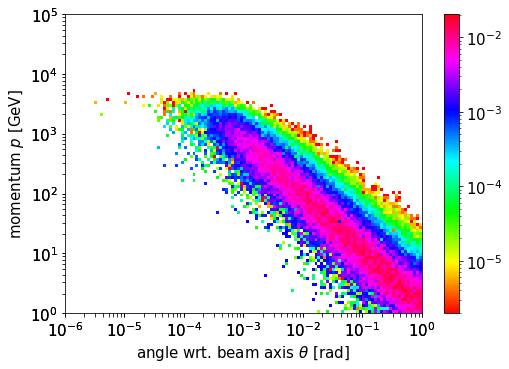

In [13]:
plot = foresee.get_llp_spectrum(1, coupling=10**-3.5, do_plot=True, save_file=False)
plot.show()

We can now produce a set of LLP spectra for various masses  (chosen to be equally spaced in log(mass)) and unit coupling and save them. 

In [14]:
masses = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

'''for mass in masses:
    foresee.get_llp_spectrum(mass=mass,coupling=1)'''

'for mass in masses:\n    foresee.get_llp_spectrum(mass=mass,coupling=1)'

## 4. Count Event Rate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. For this we need

- the `distance` from the IP in meter (default: 480)
- the `length` in meter (default: 5)
- the `luminosity` in units of fb^-1 (default: 3000)
- the `selection` depending in `x.x` and `x.y` (default: `np.sqrt(x.x**2 + x.y**2)< 1`)
- the decay `channels` which the detector can see (default: None, meaning all of them)

The default correspond to the FASER2 detector.

In [15]:
distance, selection, length, luminosity, channels = 480, "np.sqrt(x.x**2 + x.y**2)< 1", 5, 3000, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one specific HNL mass $M_{N}=1$ GeV at how many particle decay inside the decay volume. This can be done using `get_events()` for which we need to specify again the mass and filename. Additionally, we can specify 

- the `couplings` for which we evaluate the event rate as numpy array (deault `np.logspace(-8,-3,51)`)
- the `preselectioncuts` when reading the LLP spectra in terms of momentum `p` and angle `th` (default: `th<0.01 and p>100`)
- the number `nsample` describing how many randomly choosen values of $\phi_{LLP}$ should sampled (default 1). This is only relevant for detectors that are not cylyndrical or not centered around the beam axis. 
- the production `modes` which should be considered
- the `energy` of the experiments

In [16]:
mass=1.
output = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-4,-1,50))
coups, ctaus, nsigs, energies, weights, _ = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    print ("epsilon =", '{:5.3e}'.format(coup), ": nsignal =", '{:5.3e}'.format(nsig))


epsilon = 1.000e-04 : nsignal = 4.093e-02
epsilon = 1.151e-04 : nsignal = 7.194e-02
epsilon = 1.326e-04 : nsignal = 1.264e-01
epsilon = 1.526e-04 : nsignal = 2.222e-01
epsilon = 1.758e-04 : nsignal = 3.905e-01
epsilon = 2.024e-04 : nsignal = 6.863e-01
epsilon = 2.330e-04 : nsignal = 1.206e+00
epsilon = 2.683e-04 : nsignal = 2.120e+00
epsilon = 3.089e-04 : nsignal = 3.725e+00
epsilon = 3.556e-04 : nsignal = 6.547e+00
epsilon = 4.095e-04 : nsignal = 1.150e+01
epsilon = 4.715e-04 : nsignal = 2.022e+01
epsilon = 5.429e-04 : nsignal = 3.553e+01
epsilon = 6.251e-04 : nsignal = 6.242e+01
epsilon = 7.197e-04 : nsignal = 1.097e+02
epsilon = 8.286e-04 : nsignal = 1.927e+02
epsilon = 9.541e-04 : nsignal = 3.384e+02
epsilon = 1.099e-03 : nsignal = 5.943e+02
epsilon = 1.265e-03 : nsignal = 1.044e+03
epsilon = 1.456e-03 : nsignal = 1.832e+03
epsilon = 1.677e-03 : nsignal = 3.213e+03
epsilon = 1.931e-03 : nsignal = 5.635e+03
epsilon = 2.223e-03 : nsignal = 9.873e+03
epsilon = 2.560e-03 : nsignal = 1.

The previous function also outputs the energy distribution of the HNL particles which decay inside the detector. Let's have a look at them.

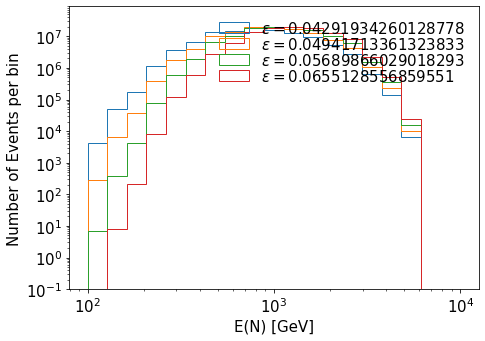

In [38]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
ens=[]
for coup,en,weight in zip(coups,energies,weights):
    if sum(weight)<9.9*10**7 : continue
    ens.append(en)
    ax.hist(en, weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$\epsilon=$"+str(coup)) 
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim(10**-1,9*10**7) 
    ax.set_xlabel("E(N) [GeV]") 
    ax.set_ylabel("Number of Events per bin") 
    ax.legend(frameon=False, labelspacing=0)
plt.tight_layout()
plt.show()

FORESEE also includes a function `write_events()` which obtains an unweighted sample of LLP decay events and saves them as a HEPMC file. For this function, we need to specify
- the `mass` and `coupling` of the LLP
- the collision `energy`
- the number of events `numberevent` that should be samples (optional, default=10)
- the `filename` of the output file (optional, default=`model/events/<mass>_<coupling>.hepmc`)
- the z-position (in meter) of the beginning of the decay volume (optional, default=0)
- a random `seed` (optional, default=None)
- the `decaychannels` for which the event should bbe written to file (optional, default=None meaning that all channels are written to file)

At the moment, FORESEE only supports 2-body LLP decays. For all other cases, including those where no final state information was specified when initiating the `Model`, the LLP will not be decayed. 

In [18]:
foresee.write_events(filename="model/events/test.hepmc", mass=1., coupling=1.000e-05, 
    energy="14", numberevent=10, zfront=0, decaychannels=["e_mu"])

0.132211


Let us have a look at a the output:

In [19]:
f = open("model/events/test.hepmc", 'r')
file_contents = f.read()
print (file_contents)

HepMC::Version 2.06.09
HepMC::IO_GenEvent-START_EVENT_LISTING
E 0 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 5.4058063802974545e-08 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 0.9256933707 243.9973216502 1298.7824043867 555867389291.2937 1 2 0
P 1 32 0.0011303254 0.297934901 586.1078278122 586.1087566222 1.0 2 0 0 -1 0
P 2 11 0.046276992 -0.3641656003 182.2163958194 182.2167655947 0.0005109986 1 0 0 0 0
P 3 13 -0.0451466667 0.6621005014 403.8914320188 403.8919910534 0.1056579999 1 0 0 0 0
E 1 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 5.4058063802974545e-08 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 -158.0887353608 -873.2561416332 2069.4407137155 916240766483.36 1 2 0
P 1 32 -0.0479911495 -0.2650952072 145.7138958416 145.7175762218 1.0 2 0 0 -1 0
P 2 11 0.4538868645 -0.2451301483 64.8656571073 64.8677082553 0.0005109977 1 0 0 0 0
P 3 13 -0.501878014 -0.0199650589 80.8482387343 80.8498679665 0.105658 1 0 0 0 0
E 2 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 5.4058063802974545e-08 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 484.788104

## 5. Parameter Scan

In the following, we will get the LLP sensitivity reach for different detector configuraions. As an example, we show the FASER2 reach for dark photons for 3 scenarios. We just need to loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later.

- the nominal/default setup

In [20]:
'''#this part works, just long run time
#specify setup
luminosity, distance = 3000 , 480
setup, selection, channels = "default", "np.sqrt(x.x**2 + x.y**2)< 1", None
foresee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-4,-1,50))
    list_nevents.append(nevents)  
    
#save results
np.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'''

'#this part works, just long run time\n#specify setup\nluminosity, distance = 3000 , 480\nsetup, selection, channels = "default", "np.sqrt(x.x**2 + x.y**2)< 1", None\nforesee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)\n\n#get reach \nlist_nevents = []    \nfor mass in masses:\n    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-4,-1,50))\n    list_nevents.append(nevents)  \n    \n#save results\nnp.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'

- a displaced setup, in which the detector is displaced by 1m from it's nominal position

In [21]:
#this part works, just long run time
'''
#specify setup
luminosity, distance = 3000 , 480
setup, selection, channels = "displaced", "np.sqrt((x.x-1)**2 + x.y**2)< 1", None
foresee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-4,-1,50))
    list_nevents.append(nevents)  
    
#save results
np.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'''

'\n#specify setup\nluminosity, distance = 3000 , 480\nsetup, selection, channels = "displaced", "np.sqrt((x.x-1)**2 + x.y**2)< 1", None\nforesee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)\n\n#get reach \nlist_nevents = []    \nfor mass in masses:\n    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-4,-1,50))\n    list_nevents.append(nevents)  \n    \n#save results\nnp.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'

- a search that only considered dark photon decays into electrons 

In [22]:
#this part works, just long run time
'''
#specify setup
luminosity, distance = 3000 , 480
setup, selection, channels = "e_mu", "np.sqrt(x.x**2 + x.y**2)< 1", ["e_mu"]
foresee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-4,-1,50))
    list_nevents.append(nevents)  
    
#save results
np.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'''

'\n#specify setup\nluminosity, distance = 3000 , 480\nsetup, selection, channels = "e_mu", "np.sqrt(x.x**2 + x.y**2)< 1", ["e_mu"]\nforesee.set_detector(selection=selection, channels=channels, distance=distance, luminosity=luminosity)\n\n#get reach \nlist_nevents = []    \nfor mass in masses:\n    couplings, _, nevents, _, _ , _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-4,-1,50))\n    list_nevents.append(nevents)  \n    \n#save results\nnp.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'

## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [23]:
setups = [
    ["14TeV_default.npy",    "default"  , "red",     "solid", 0., 3],
]
'''["14TeV_displaced.npy",  "displaced", "orange",  "solid", 0., 3],
    ["14TeV_e_mu.npy",   "e_mu" , "magenta", "solid", 0., 3],'''

'["14TeV_displaced.npy",  "displaced", "orange",  "solid", 0., 3],\n    ["14TeV_e_mu.npy",   "e_mu" , "magenta", "solid", 0., 3],'

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [24]:
bounds = [ 
    ["bounds_BBN_el.txt",  "BBN"  , 3*10**-1    , 3*10**-5        , -40  ],
    ["bounds_el.txt",None,  0.220, 0.9*10**-4, 0  ],
    ]

'''["bounds_LHCb_el.txt",  "LHCb"  , 0    , 0         , 0  ]
    ["bounds_el.txt", None,  0.220, 0.9*10**-4, 0  ],
'''

#this one doesnt even show up
#["bounds_LHCb_el.txt",  None  , 0    , 0         , 0  ]


projections = [




    ["limits_SHiP_el.txt",           "orange",  "SHiP"    , 3, 10**-4, 0  ],
    ["limits_NA62_el.txt",           "blue",    "NA62"    ,1, 0.0002 , 0  ],
    ["limits_DUNE_el.txt",           "magenta",    "DUNE"    ,0.6, 0.00009 , 0  ],
    ['limits_CODEX_el.txt',           "purple",    "CODEX"    ,2*10**-1, 0.0003, 0  ],
    ["limits_MATHUSLA_el.txt",           "forestgreen",  "MATHUSLA"    , 0.3, 0.0001 , 0  ]



]






Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

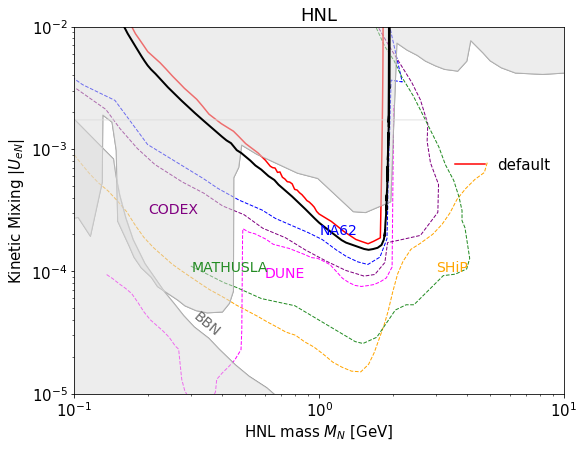

In [25]:
import pandas as pd
df_ref=pd.read_csv('/Users/alechewitt/Desktop/Jonathan_research/Git/FORESEE_HNL/Models/HNL/model/reachref.csv')
plot = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    title="HNL",
    xlims = [10**-1,10], 
    ylims=[10**-5,10**-2],
    xlabel=r"HNL mass $M_{N}$ [GeV]", 
    ylabel=r"Kinetic Mixing $|U_{eN}|$",
    legendloc=(1,0.68),
    figsize=(8,6),
)
refx=df_ref.iloc[:,0].tolist()
refy=df_ref.iloc[:,1].tolist()
#digitized values from bounds on felix paper
UeN=[0.000105657,
0.000166075,
0.000265000,
0.000374817,
0.000429368,
0.000905614,
0.00106895,
0.000859359,
0.000594447,
.000407951,
.000313497,
.000351086,
.000608800,
.00139489,
.00336928,
.00653970,
.00584161,
.00649316,
.00533902,
.00374895,
.00366726,
.00372535,]
MN=[0.400177,
0.402906,
0.399575,
0.399349,
0.453839,
0.488770,
0.488638,
0.599131,
0.956599,
1.20004,
1.57479,
1.76296,
2.04795,
2.04517,
2.08892,
1.99439,
2.21675,
2.53841,
2.97469,
4.50532,
6.42077,
9.50142]
#plot.plot(MN,UeN, color="k", lw=2)
plot.plot(refx,refy, color="k", lw=2)
plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("/Users/alechewitt/Desktop/Figure.pdf")
plot.show()

## 7. Export Contours

It might also be useful to extract the contours lines, and save them as a text file. This can be done using the `extract_contours()` function. As example, let us export the FASER2 line. 

In [26]:
foresee.extract_contours(
    inputfile="model/results/14TeV_default.npy", 
    outputfile="model/lines/limits_FASER2.txt"
)